## Домашнее задание к лекции «Задачи классификации и кластеризации»

### Задание.

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
1. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
1. Разделите данные на выборку для обучения и тестирования
1. Постройте модель LDA
1. Визуализируйте предсказания для тестовой выборки и центры классов
1. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
1. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df = df[['sepal length (cm)', 'sepal width (cm)']]
df['variety'] = pd.DataFrame(iris.target)
df.head()

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [4]:
X, y = df[['sepal length (cm)', 'sepal width (cm)']], df['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [6]:
lda.predict(X_test)

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [7]:
y_test.reset_index(drop=True, inplace=True)

In [8]:
res = pd.DataFrame([y_test, lda.predict(X_test)]).T
res.head()

,variety,Unnamed 0
0,2,1
1,1,1
2,0,0
3,2,2
4,0,0


In [9]:
accuracy_score(y_test, lda.predict(X_test))

0.8

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

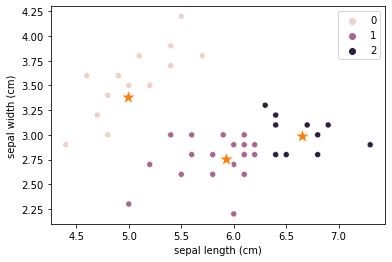

In [10]:
sns.scatterplot(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], hue=lda.predict(X_test))
sns.scatterplot(x=lda.means_[:, 0], y=lda.means_[:, 1], marker='*', legend=False, s=300)

In [11]:
clast = df[['sepal length (cm)', 'sepal width (cm)']]
clast.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [13]:
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    kmeans_ = KMeans(n_clusters=k)
    kmeans_.fit(clast)
    # добавляем инерцию каждой модели в список
    k_inertia.append(kmeans_.inertia_)

C:\Users\fight\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:>

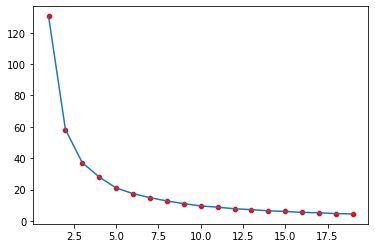

In [14]:
sns.lineplot(x=ks, y=k_inertia)
sns.scatterplot(x=ks, y=k_inertia, color='red')

После числа кластеров, равного 3, инерция перестает сильно изменяться, поэтому примем n_clusters = 3.

In [23]:
kmeans = KMeans(n_clusters=3)
clast_n = kmeans.fit_transform(clast)
kmeans.fit_predict(clast_n)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1])

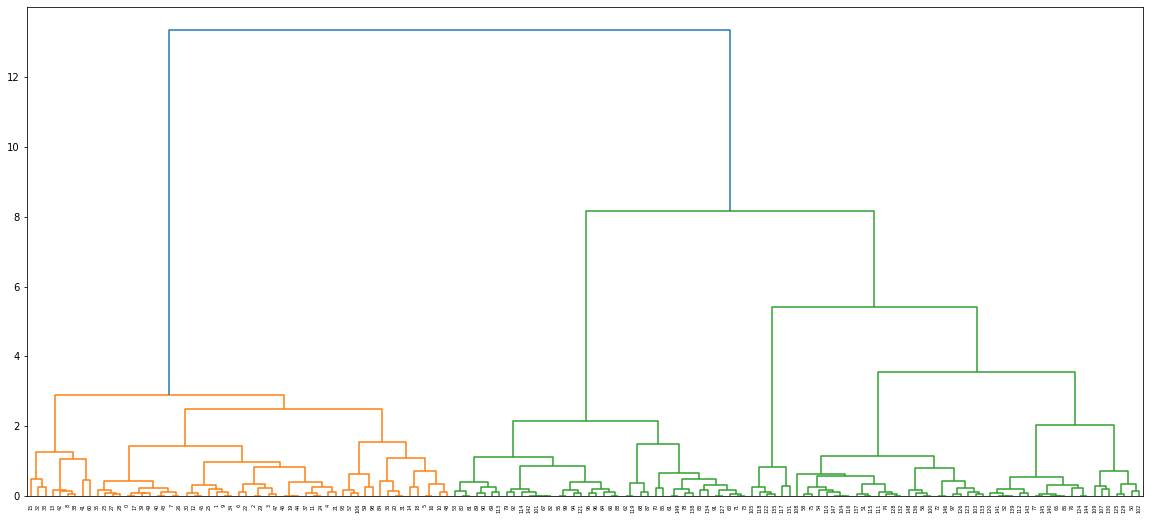

In [30]:
dist_matrix = pdist(clast_n)
Z = hierarchy.linkage(dist_matrix, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)